In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from functools import partial
import time
import math

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [2]:
VECTOR_LENGTH = 10

def normalize(v):
  return (v / np.linalg.norm(v))

def sigmoid(x, w):
  return (1.0 / (1.0 + math.exp(-np.dot(x, w))))

# simulate tossing a biased coin that comes up 1 with probability sigmoid(x, w)
def get_label(x, w):
  return int(np.random.random() < sigmoid(x, w))

def generate_training_set(m):
  # randomly generating a weight vector w of length 10 with norm = 1
  w = np.random.rand(VECTOR_LENGTH)
  w = normalize(w)
  # generating the x_i's and y_i's
  X = np.random.randn(m, VECTOR_LENGTH)
  y = np.array([get_label(x, w) for x in X])
  return X, y, w


## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [3]:
ITERATIONS = 1000

# returns the weight vector learnt by the inbuilt logistic regression algorithm
def w_by_logistic(X, y):
  clf = LogisticRegression(fit_intercept = False, max_iter = ITERATIONS, 
                           solver="lbfgs").fit(X, y)
  return clf.coef_

## Algorithm 2: stochastic gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  stochastic gradient descent with respect to square loss (run for 1000 iterations, use step size eta = 0.01).

# <u>Gradient calculation</u>

The gradient of <i>L<sub>i</sub></i> with respect to <i>w</i> is as follows :

$$\nabla L_i(w) = \sigma(w \cdot x_i)*(\sigma(w \cdot x_i) - y_i)*(1 - \sigma(w \cdot x_i))*x_i$$

The stochastic gradient descent update rule for <i>w</i> is as follows :

$$w^{(t+1)} = w^{(t)} - \eta\nabla L_i(w)|_{w^{(t)}}$$

The index <i>i</i> is chosen at random.

In [4]:
STEP_SIZE = 0.01

def gradient(x, y_i, w):
  sigmoid_value = sigmoid(x, w)
  return sigmoid_value*(sigmoid_value - y_i)*(1 - sigmoid_value)*x

def w_by_descent(X, y):
  w = normalize(np.ones(VECTOR_LENGTH)) # initial w vector
  m = X.shape[0]
  for i in range(ITERATIONS):
    random_index = np.random.choice(m)
    x, y_i = X[random_index], y[random_index]
    w = w - STEP_SIZE * gradient(x, y_i, w)
  return w
                 

## Evaluation

Measure error $||w - \hat{w}||_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1 and 2.  Plot the results
  for Algorithms 1 and 2, as you make $m$ large. Try $m=50, 100, 150, 200, 250$.


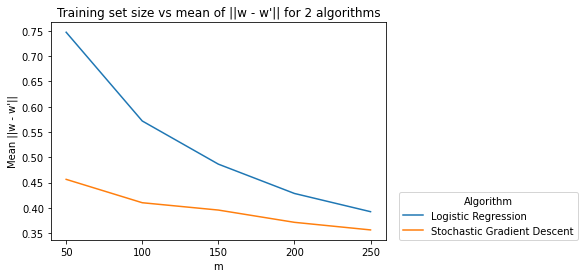

Mean ||w - w'|| for different values of m for Logistic Regression:

50 -> 0.747
100 -> 0.572
150 -> 0.486
200 -> 0.428
250 -> 0.392


Mean ||w - w'|| for different values of m for Stochastic Gradient Descent:

50 -> 0.456
100 -> 0.410
150 -> 0.395
200 -> 0.371
250 -> 0.356


In [5]:
W_NUMBER_PER_M = 100 # number of weight vectors for a value of m
VALUES_OF_M = range(50, 300, 50)

def error(w1, w2):
  return np.linalg.norm(w1 - w2)

# computes the mean error for both the algorithms for a particular value of m
def algorithm_error(m):
  error_for_logistic, error_for_descent = 0, 0
  for i in range(W_NUMBER_PER_M):
    X, y, w = generate_training_set(m)
    logistic_w = normalize(w_by_logistic(X, y))
    descent_w = normalize(w_by_descent(X, y))
    error_for_logistic += error(w, logistic_w)
    error_for_descent += error(w, descent_w)
  error_for_logistic /= W_NUMBER_PER_M
  error_for_descent /= W_NUMBER_PER_M
  return error_for_logistic, error_for_descent

# computes the mean errors for both the algorithms for all values of m
def evaluate():
  errors_for_logistic, errors_for_descent = [], []
  for m in VALUES_OF_M:
    error_for_logistic, error_for_descent = algorithm_error(m)
    errors_for_logistic.append(error_for_logistic)
    errors_for_descent.append(error_for_descent)
  return errors_for_logistic, errors_for_descent

def print_errors(errors, algorithm):
  print("Mean ||w - w'|| for different values of m for {}:".format(algorithm))
  print()
  for m, error in zip(VALUES_OF_M, errors):
    print("{0} -> {1:.3f}".format(m, error))
  
# plots the mean errors for all values of m
def plot():
  errors_for_logistic, errors_for_descent = evaluate()
  plt.title("Training set size vs mean of ||w - w'|| for 2 algorithms")
  plt.xlabel("m")
  plt.ylabel("Mean ||w - w'||")
  plt.xticks(VALUES_OF_M)
  plt.plot(VALUES_OF_M, errors_for_logistic, label="Logistic Regression")
  plt.plot(VALUES_OF_M, errors_for_descent, label="Stochastic Gradient Descent")
  plt.legend(loc=(1.04, 0), title='Algorithm')
  plt.show()
  print_errors(errors_for_logistic, "Logistic Regression")
  print("\n")
  print_errors(errors_for_descent, "Stochastic Gradient Descent")
  
plot()